Compute and represent the time series of sea level derived from the water pressure at 6 meters and the atmospheric pressure at sea level.

# Import modules

In [1]:
import os
import glob
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib  import colors
import datetime, time, calendar
import matplotlib.text as text
import matplotlib as mpl
%matplotlib inline

# Files and directories

In [25]:
figdir = '/home/ctroupin/Projects/201530627_Rissaga/20160207/SeaWaterPressure/'
figname = 'sea_level_20160207'
ciutadellafile1 = 'http://thredds.socib.es/thredds/dodsC/mooring/current_profiler/station_ciutadella-ime_awac001/L1/dep0001_station-ciutadella_ime-awac001_L1_latest.nc'
ciutadellafile2 = 'http://thredds.socib.es/thredds/dodsC/mooring/barometer/station_ciutadella-scb_baro005/L1/dep0001_station-ciutadella_scb-baro005_L1_latest.nc'

# Parameters

Set the gravitational acceleration (g) and the reference depth for the sensor (href).<br>
The density can be computed from the sea water temperature, assuming a constant value for the salinity. Otherwise we use a constant value of 1028 $kg/m^3$.

In [32]:
rho = 1028.
salinity = 37.8
g = 9.81
href = 6.

Define time limits for the plot

In [43]:
timeinit,timeend = datetime.datetime(2016, 2, 7, 4, 0), datetime.datetime(2016, 2, 7, 18, 0)
tmin, tmax = time.mktime(timeinit.timetuple()), time.mktime(timeend.timetuple())

# Read data

Load the data from the AWAC.<br> 
We load the temperature to later compute the density.

In [44]:
with netCDF4.Dataset(ciutadellafile1,'r+', format='NETCDF4') as nc:
    time_water_pressure = nc.variables['time'][:]
    time_water_pressure_units = nc.variables['time'].units
    goodtime = np.where(np.logical_and((time_water_pressure<=tmax),(time_water_pressure>=tmin)))[0]
    water_pressure = nc.variables['WTR_PRE'][goodtime]
    sea_water_temperature = nc.variables['WTR_TEM'][goodtime]
    time_water_pressure = time_water_pressure[goodtime]

Load the data from the barometer

In [45]:
with netCDF4.Dataset(ciutadellafile2,'r+', format='NETCDF4') as nc:
    time_air_pressure = nc.variables['time'][:]
    time_air_pressure_units = nc.variables['time'].units
    goodtime = np.where(np.logical_and((time_air_pressure<=tmax),(time_air_pressure>=tmin)))[0]
    air_pressure = nc.variables['AIR_PRE'][goodtime]
    time_air_pressure = time_air_pressure[goodtime]

# Figure to check

Convert time

In [46]:
time_water_pressure2 = netCDF4.num2date(time_water_pressure, time_water_pressure_units)
time_air_pressure2 = netCDF4.num2date(time_air_pressure, time_air_pressure_units)

Convert pressure to common units ($N/m^2$)

In [47]:
water_pressure2 = water_pressure * 10000.
air_pressure2 = air_pressure * 100.

Make simple plot

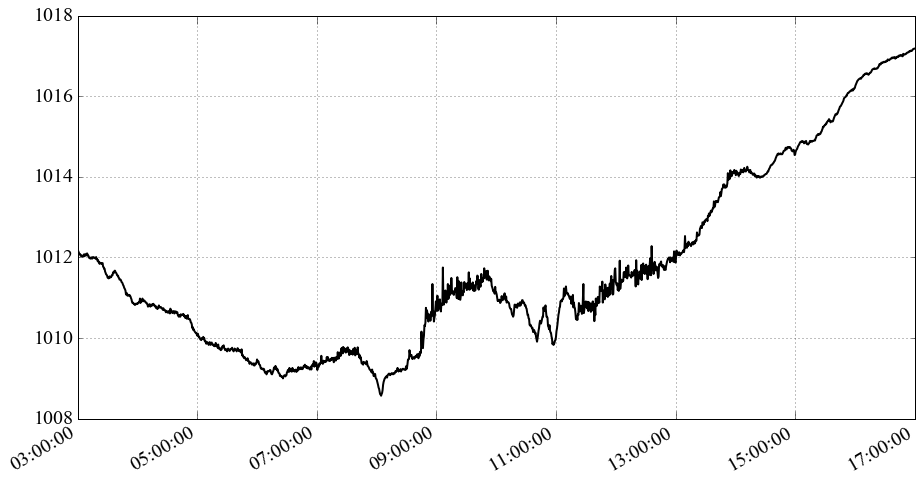

In [48]:
mpl.rcParams.update({'font.size': 20, 'font.family': 'Times New Roman'})

fig = plt.figure(figsize=(15, 8))
# plt.plot(time_water_pressure2, water_pressure, 'b')
plt.plot(time_air_pressure2, air_pressure, 'k')
plt.grid()
fig.autofmt_xdate()
plt.show()

# Plot sea level height

## Compute density using sea water temperature and depth

We use the EOS80 Equation of State.  

In [49]:
from seawater import eos80
sea_water_density = eos80.dens(salinity, sea_water_temperature, water_pressure)

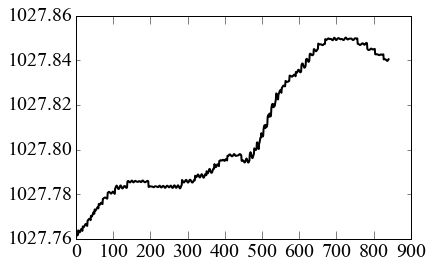

In [50]:
plt.figure()
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.plot(sea_water_density)
plt.show()

## Compute sea level height

In [51]:
sea_level = water_pressure2 / (sea_water_density * g) - href

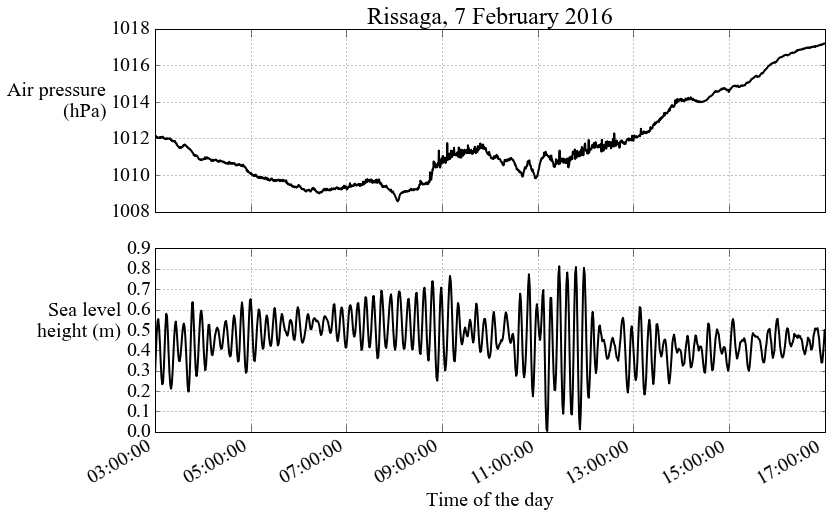

In [54]:
mpl.rcParams.update({'font.size': 20, 'font.family': 'Times New Roman'})

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(2,1,1)
plt.title('Rissaga, 7 February 2016')
plt.plot(time_air_pressure2, air_pressure, 'k')
plt.ylabel('Air pressure\n (hPa)', rotation=0, horizontalalignment='right')
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.grid()
ax = fig.add_subplot(2,1,2)
plt.plot(time_water_pressure2, sea_level, 'k')
plt.grid()
plt.xlabel('Time of the day')
plt.ylabel('Sea level\n height (m)', rotation=0, horizontalalignment='right')
fig.autofmt_xdate()
plt.savefig(os.path.join(figdir, figname), dpi=300, facecolor='w', edgecolor='w',
         transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()